<a href="https://colab.research.google.com/github/tomledeakin/M04W01_508/blob/master/M04W01_508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise 1**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    # Extract the column at the specified index
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index = 0)
    tv_data = get_column(data, 0)

    # get radio (index = 1)
    radio_data = get_column(data, 1)

    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # get sales (index = 3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y


In [ ]:
X, y = prepare_data('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')

list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]

print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [ ]:
# Question 1: a ) [624.1 , 175.1 , 300.5 , 78.9]

## **Exercise 2**

#### **2.1**

In [ ]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b


In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b


In [ ]:
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2


In [ ]:
def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi


In [ ]:
def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)


In [ ]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db


In [ ]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    # Training loop
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return w1, w2, w3, b, losses


In [ ]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )

1.0


#### **2.2**

In [ ]:
# Question 2: a ) 1.0

In [ ]:
l = compute_loss_mse( y_hat =1 , y =0.5)
print ( l )


0.25


#### **2.3**

In [ ]:
# Question 3: a ) 0.25

#### **2.4**

In [ ]:
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )


-1.0


In [ ]:
# Question 4: a ) -1.0

In [ ]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )


-3.0


In [ ]:
# Question 5: b ) -3.0

#### **2.5**

In [ ]:
after_wi = update_weight_wi( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print( after_wi )


1.000005


In [ ]:
# Question 6: a ) 1.000005

In [ ]:
after_b = update_weight_b( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print(after_b)

0.50001


In [ ]:
# Question 7: a ) 0.50001

#### **2.6**

In [ ]:
X, y = prepare_data('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')

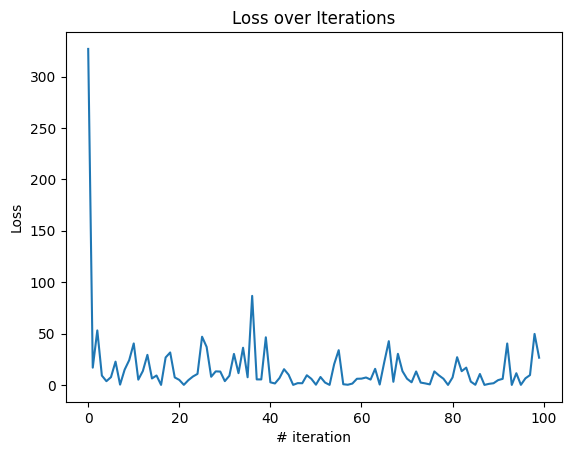

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)

# Plot the loss for the first 100 iterations
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()


In [ ]:
X , y = prepare_data ('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')
( w1 , w2 , w3 , b , losses ) = implement_linear_regression(X , y)
print ( w1 , w2 , w3 )


0.07405984066396477 0.15917360263437663 0.017561197559948935


In [ ]:
# Question 8: a ) w1 = 0.074 , w2 = 0.15 , w3 = 0.17

In [ ]:
# Given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

# Assuming prepare_data and implement_linear_regression are already defined
X, y = prepare_data('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Predict sales
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales is {sales}')

Predicted sales is 8.176413319549823


In [ ]:
# Question 9: b ) predicted sales is 8.18

#### **2.7**

In [ ]:
def compute_loss_mae(y, y_hat):
    return abs(y_hat - y)

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)


0.5


In [ ]:
# Question 10: a ) 0.5

In [ ]:
def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    # Training loop
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mae(y, y_hat)

            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return w1, w2, w3, b, losses


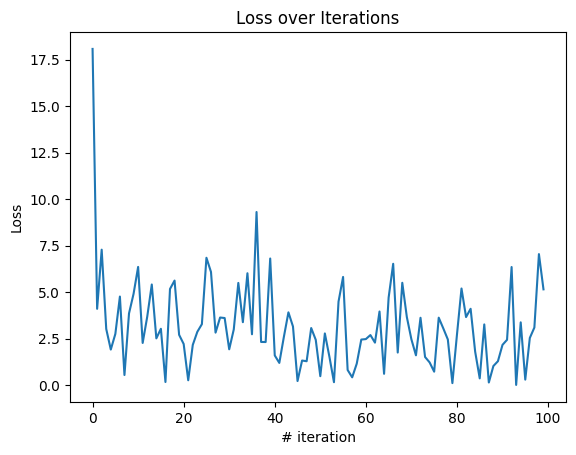

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_mae(X, y)

# Plot the loss for the first 100 iterations
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()


## **Exercise 3**

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    # Training loop
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing N samples (batch update)
        w1 -= lr * (dw1_total / N)
        w2 -= lr * (dw2_total / N)
        w3 -= lr * (dw3_total / N)
        b -= lr * (db_total / N)

        # Logging the average loss for this epoch
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

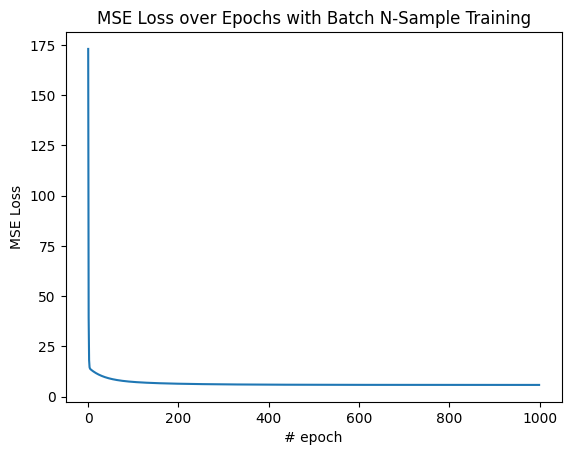

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)

# Plotting the loss over epochs
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Epochs with Batch N-Sample Training")
plt.show()


In [ ]:
# Assuming prepare_data and implement_linear_regression_nsamples are already defined
X, y = prepare_data('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')

# Using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

print( w1 , w2 , w3 )


0.06710990754044266 0.15756173831487585 0.029619799386084403


In [ ]:
# Question 11:

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    # Training loop
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss using MAE
            loss = compute_loss_mae(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradients (using the same gradients as MSE because they come from the model structure, not the loss type)
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Update parameters after processing N samples (batch update)
        w1 -= lr * (dw1_total / N)
        w2 -= lr * (dw2_total / N)
        w3 -= lr * (dw3_total / N)
        b -= lr * (db_total / N)

        # Logging the average loss for this epoch
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

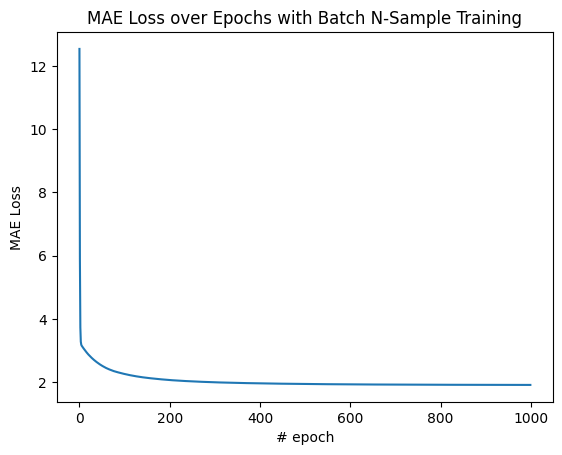

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)

# Plotting the loss over epochs
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MAE Loss")
plt.title("MAE Loss over Epochs with Batch N-Sample Training")
plt.show()


## **Exercise 4**

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


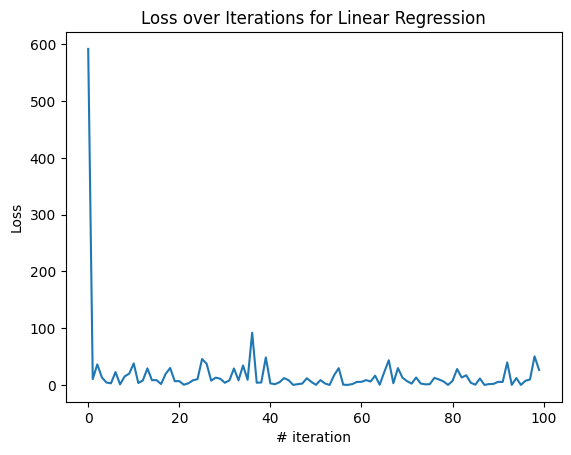

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Helper function to get columns from the dataset
def get_column(data, index):
    result = data[:, index].tolist()
    return result

# Function to prepare the data
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)

    # Get columns using numpy slicing
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # Check lengths of columns to ensure they match
    if not (len(tv_data) == len(radio_data) == len(newspaper_data) == len(sales_data)):
        print("Data columns have mismatched lengths!")
        return None, None

    # Building X input: [1, tv, radio, newspaper]
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

# Function to initialize weights
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # Using specified initial values for consistency
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

# Predict output using y = x0 * b + x1 * w1 + x2 * w2 + x3 * w3
def predict(X_features, weights):
    result = sum(w * x for w, x in zip(weights, X_features))
    return result

# Compute MSE loss
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# Compute gradients for weights
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2 * (y_hat - y) * x for x in X_features]
    return dl_dweights

# Update weights using gradient descent
def update_weight(weights, dl_dweights, lr):
    updated_weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return updated_weights

# Implement linear regression with batch gradient descent
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        print("Epoch", epoch)
        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y_hat, y)

            # Compute gradients
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)

    return weights, losses

# Main code to prepare data, train model, and plot results
X, y = prepare_data('/content/drive/MyDrive/AI VIETNAM/Module 4/advertising.csv')

# Ensure X and y were successfully prepared
if X is None or y is None:
    print("Data preparation failed due to mismatched column lengths.")
else:
    # Train the linear regression model
    W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

    # Plot the loss over iterations
    plt.plot(L[0:100])
    plt.xlabel("# iteration")
    plt.ylabel("Loss")
    plt.title("Loss over Iterations for Linear Regression")
    plt.show()


In [ ]:
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print ( L [9999])


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
31.339223408109948


In [ ]:
# Question 12: a ) 31.33